# sspa tutorial: Single sample pathway analysis in Python

In [1]:
import sspa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Using example data (metabolomics)

In [2]:
# We will import the metabolite pathways from the Reactome database
# We must specify one of the Reactome organism names
# This a GMT format pandas DataFrame containing the pathway information
reactome_pathways  = sspa.process_reactome(organism="Homo sapiens")

In [3]:
kegg_human_pathways  = sspa.process_kegg(organism="hsa")

In [5]:
reactome_pathways

,Pathway_name,0,1,2,3,4,5,6,7,8,...,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477
R-HSA-1059683,Interleukin-6 signaling,30616,456216,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109581,Apoptosis,61120,4705,456216,28494,36080,15377,43474,30616,16412,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109582,Hemostasis,15366,91144,15377,15378,15379,456215,456216,35366,37941,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109606,Intrinsic Pathway for Apoptosis,456216,28494,36080,15377,43474,30616,None,None,None,...,None,None,None,None,None,None,None,None,None,None
R-HSA-109703,PKB-mediated events,456216,16618,17489,15377,456215,30616,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-HSA-983695,Antigen activates B Cell Receptor (BCR) leadin...,57540,456216,16618,18348,36080,16595,29108,17815,30616,...,None,None,None,None,None,None,None,None,None,None
R-HSA-983705,Signaling by the B Cell Receptor (BCR),57540,456216,16618,29034,18348,58189,36080,29105,16595,...,None,None,None,None,None,None,None,None,None,None
R-HSA-983712,Ion channel transport,17544,49552,15377,15378,35475,456216,30616,16038,76072,...,None,None,None,None,None,None,None,None,None,None
R-HSA-991365,Activation of GABAB receptors,58189,29103,17552,59888,43474,18420,37565,None,None,...,None,None,None,None,None,None,None,None,None,None


In [4]:
kegg_human_pathways

,Pathway_name,0,1,2,3,4,5,6,7,8,...,316,317,318,319,320,321,322,323,324,325
hsa00010,Glycolysis / Gluconeogenesis - Homo sapiens (h...,C00221,C15972,C01159,C00267,C06188,C06187,C00022,C01451,C00118,...,None,None,None,None,None,None,None,None,None,None
hsa00020,Citrate cycle (TCA cycle) - Homo sapiens (human),C15972,C00026,C00022,C05125,C00024,C16255,C00122,C00417,C00158,...,None,None,None,None,None,None,None,None,None,None
hsa00030,Pentose phosphate pathway - Homo sapiens (human),C03752,C00221,C01801,C00257,C00258,C20589,C00121,C00620,C00022,...,None,None,None,None,None,None,None,None,None,None
hsa00040,Pentose and glucuronate interconversions - Hom...,C20680,C06441,C00508,C04575,C00474,C00714,C00532,C05411,C00026,...,None,None,None,None,None,None,None,None,None,None
hsa00051,Fructose and mannose metabolism - Homo sapiens...,C01721,C00424,C00976,C00096,C00267,C00159,C01099,C11544,C01934,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa05412,Arrhythmogenic right ventricular cardiomyopath...,C01330,C00076,NaN,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
hsa05414,Dilated cardiomyopathy - Homo sapiens (human),C00575,C01330,C00076,NaN,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
hsa05415,Diabetic cardiomyopathy - Homo sapiens (human),C00051,C05981,C00352,C00022,C00546,C22311,C00118,C00873,C00236,...,None,None,None,None,None,None,None,None,None,None
hsa05417,Lipid and atherosclerosis - Homo sapiens (human),C00027,C00338,C00187,C01245,C00422,C02530,C21011,C05981,C00865,...,None,None,None,None,None,None,None,None,None,None


In [2]:
# load custom gmt file
custom_pathways = sspa.process_gmt("src/sspa/pathway_databases/KEGG_human_pathways_compounds_R98.csv")

In [4]:
# custom_pathways_gmt = sspa.process_gmt("/Users/cw2019/Downloads/ReactomePathways.gmt")
custom_pathways_gmt = sspa.process_gmt("/Users/cw2019/Downloads/Mouse_Human_Reactome_February_01_2022_symbol.gmt")

In [5]:
custom_pathways_gmt

,Pathway_name,2,3,4,5,6,7,8,9,10,...,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324
Pathway_ID,,,,,,,,,,,,,,,,,,,,,
LONG-TERM POTENTIATION%REACTOME%R-HSA-9620244.2,Long-term potentiation,Grin2a,Src,Nrg1,Nrgn,Camk2g,Camk2d,Dlg1,Camk2b,Gria2,...,None,None,None,None,None,None,None,None,None,None
GLYCEROPHOSPHOLIPID BIOSYNTHESIS%REACTOME%R-HSA-1483206.4,Glycerophospholipid biosynthesis,Lclat1,Plaat5,Pla2g6,Agk,Etnk1,Lpin3,Chpt1,Lpin2,Pctp,...,None,None,None,None,None,None,None,None,None,None
REGULATION OF PLK1 ACTIVITY AT G2 M TRANSITION%REACTOME%R-HSA-2565942.1,Regulation of PLK1 Activity at G2 M Transition,Nedd1,Actr1a,Haus7,Tuba1a,Haus8,Clasp1,Cdk5rap2,Pafah1b1,Ywhag,...,None,None,None,None,None,None,None,None,None,None
SUMOYLATION OF INTRACELLULAR RECEPTORS%REACTOME%R-HSA-4090294.3,SUMOylation of intracellular receptors,Nr2c1,Vdr,Sumo3,Nr1h2,Rora,Ppara,Esr1,Pparg,Pias3,...,None,None,None,None,None,None,None,None,None,None
PHOSPHORYLATION OF THE APC C%REACTOME%R-HSA-176412.3,Phosphorylation of the APC C,Cdc23,Anapc15,Plk1,Anapc5,Anapc4,Anapc1,Anapc2,Anapc11,Ube2c,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABACAVIR TRANSPORT AND METABOLISM%REACTOME%R-HSA-2161522.2,Abacavir transport and metabolism,Slc22a2,Slc22a1,Nt5c2,Guk1,Adal,Slc22a3,Pck1,Abcb1a,Abcg2,...,None,None,None,None,None,None,None,None,None,None
SIGNALING BY WNT%REACTOME%R-HSA-195721.5,Signaling by WNT,Gng3,Gng2,Gng4,Gng7,Gng8,Gngt1,Gngt2,Gnb2,Gnb1,...,None,None,None,None,None,None,None,None,None,None
ACTIVATION OF ANTERIOR HOX GENES IN HINDBRAIN DEVELOPMENT DURING EARLY EMBRYOGENESIS%REACTOME%R-HSA-5617472.2,Activation of anterior HOX genes in hindbrain ...,Pcgf2,Kmt2d,Kmt2c,Hist2h2aa1,Pagr1a,Paxip1,Yy1,Pax6,Cnot9,...,None,None,None,None,None,None,None,None,None,None


Download KEGG pathways

In [6]:
kegg_mouse_latest = sspa.process_kegg("mmu", download_latest=True, filepath=".")

Beginning KEGG download...
mmu00010
mmu00020
mmu00030
mmu00040
mmu00051
mmu00052
mmu00053
mmu00061
mmu00062
mmu00071
mmu00100
mmu00120
mmu00130
mmu00140
mmu00190
mmu00220
mmu00230
mmu00232
mmu00240
mmu00250
mmu00260
mmu00270
mmu00280
mmu00290
mmu00310
mmu00330
mmu00340
mmu00350
mmu00360
mmu00380
mmu00400
mmu00410
mmu00430
mmu00440
mmu00450
mmu00470
mmu00480
mmu00500
mmu00510
mmu00511
mmu00512
mmu00513
mmu00514
mmu00515
mmu00520
mmu00524
mmu00531
mmu00532
mmu00533
mmu00534
mmu00561
mmu00562
mmu00563
mmu00564
mmu00565
mmu00590
mmu00591
mmu00592
mmu00600
mmu00601
mmu00603
mmu00604
mmu00620
mmu00630
mmu00640
mmu00650
mmu00670
mmu00730
mmu00740
mmu00750
mmu00760
mmu00770
mmu00780
mmu00785
mmu00790
mmu00830
mmu00860
mmu00900
mmu00910
mmu00920
mmu00970
mmu00980
mmu00982
mmu00983
mmu01040
mmu01100
mmu01200
mmu01210
mmu01212
mmu01230
mmu01240
mmu01250
mmu01521
mmu01522
mmu01523
mmu01524
mmu02010
mmu03008
mmu03010
mmu03013
mmu03015
mmu03018
mmu03020
mmu03022
mmu03030
mmu03040
mmu03050
mmu03060
m

In [2]:
# download Reactome latest
reactome_mouse_latest = sspa.process_reactome("Mus musculus", download_latest=True, filepath=".")

Beginning Reactome download...
Reactome DB file saved to ./Reactome_Mus musculus_pathways_compounds_R79.gmt
Complete!


In [3]:
reactome_mouse_latest_read = sspa.process_gmt("./Reactome_Mus musculus_pathways_compounds_R79.gmt")

In [4]:
reactome_mouse_latest_read

,Pathway_name,2,3,4,5,6,7,8,9,10,...,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334
Pathway_ID,,,,,,,,,,,,,,,,,,,,,
R-MMU-1059683,Interleukin-6 signaling,30616,456216,,,,,,,,...,,,,,,,,,,
R-MMU-109581,Apoptosis,61120,4705,456216,28494,15377,43474,30616,16412,,...,,,,,,,,,,
R-MMU-109582,Hemostasis,58115,140420,140421,15366,91144,28938,140427,15627,16783,...,,,,,,,,,,
R-MMU-109606,Intrinsic Pathway for Apoptosis,456216,28494,15377,43474,30616,,,,,...,,,,,,,,,,
R-MMU-109703,PKB-mediated events,17489,15377,456215,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-MMU-983695,Antigen activates B Cell Receptor (BCR) leadin...,456216,16618,18348,36080,16595,29108,17815,30616,,...,,,,,,,,,,
R-MMU-983705,Signaling by the B Cell Receptor (BCR),456216,16618,29034,18348,58189,36080,29105,16595,29108,...,,,,,,,,,,
R-MMU-983712,Ion channel transport,17544,15377,15378,35475,456216,30616,16038,76072,29101,...,,,,,,,,,,


## Pre-processing example dataset

In [2]:
covid_data = sspa.load_example_data(omicstype="metabolomics", processed=False)

In [3]:
covid_values = covid_data.iloc[:, :-2]
data_filt = covid_values.loc[:, covid_values.isin([' ', np.nan, 0]).mean() < 0.5]

met_median = data_filt.median(axis=0, skipna=True)  # median value for each metabolite
scale_mat = data_filt.divide(met_median, axis=1)  # scale the matrix by the metabolite median
samp_median = scale_mat.median(axis=1, skipna=True)  # median value for each sample
norm_mat = data_filt.divide(samp_median, axis=0)  # scale by sample median

imputed_mat = norm_mat.fillna(norm_mat.median())
log2_mat = np.log2(imputed_mat)
processed_data = pd.DataFrame(StandardScaler().fit_transform(log2_mat), columns=imputed_mat.columns, index=imputed_mat.index)
print(processed_data.head())


           S-1-pyrroline-5-carboxylate  spermidine  1-methylnicotinamide  \
sample_id                                                                  
1004596                      -0.756979    0.552163             -0.317382   
1008097                       0.079818   -0.839393              0.491280   
1008631                       0.978372   -1.281277             -0.199487   
1012545                      -0.937540   -0.242391              1.636530   
1022407                      -0.652496   -0.110733              0.814461   

           12,13-DiHOME  alpha-ketoglutarate  kynurenate  \
sample_id                                                  
1004596        0.726321            -0.608606   -0.815994   
1008097       -1.867786            -0.044496   -0.390190   
1008631        0.355229             0.014784   -0.447509   
1012545        2.080704            -0.315610    0.111717   
1022407       -0.886903             0.409608    0.274345   

           3-hydroxyisobutyrate  3-hydroxy-3-m

## Identifier harmonisation

In [74]:
compound_names = processed_data.columns.tolist()
conversion_table = sspa.identifier_conversion("name", compound_names)

In [75]:
conversion_table

,Query,Match,HMDB,PubChem,ChEBI,KEGG,METLIN,SMILES,Comment
0,S-1-pyrroline-5-carboxylate,NA,NA,NA,NA,NA,NA,NA,0
1,spermidine,Spermidine,HMDB0001257,1102,16610,C00315,254,NCCCCNCCCN,1
2,1-methylnicotinamide,1-Methylnicotinamide,HMDB0000699,457,16797,C02918,5667,C[N+]1=CC=CC(=C1)C(N)=O,1
3,"12,13-DiHOME","12,13-DHOME",HMDB0004705,10236635,72665,C14829,None,CCCCCC(C(C/C=C\CCCCCCCC(=O)O)O)O,1
4,alpha-ketoglutarate,Oxoglutaric acid,HMDB0000208,51,30915,C00026,5218,OC(=O)CCC(=O)C(O)=O,1
...,...,...,...,...,...,...,...,...,...
895,"bilirubin degradation product, C17H20N2O5 (2)**",NA,NA,NA,NA,NA,NA,NA,0
896,tetrahydrocortisol glucuronide,NA,NA,NA,NA,NA,NA,NA,0
897,"N,N-dimethyl-pro-pro",NA,NA,NA,NA,NA,NA,NA,0
898,oxindolylalanine,NA,NA,NA,NA,NA,NA,NA,0


In [76]:
conversion_table["Comment"].value_counts()

0    547
1    353
Name: Comment, dtype: int64

In [92]:
processed_data_mapped = sspa.map_identifiers(conversion_table, "ChEBI", processed_data)

{'spermidine': '16610', '1-methylnicotinamide': '16797', '12,13-DiHOME': '72665', 'alpha-ketoglutarate': '30915', 'kynurenate': '18344', '3-hydroxyisobutyrate': '37373', '3-hydroxy-3-methylglutarate': '16831', '3-phosphoglycerate': '17050', 'cholate': '16359', '4-hydroxyphenylacetate': '18101', '5,6-dihydrothymine': '27468', 'hypoxanthine': '17368', '9,10-DiHOME': '72663', 'quinolinate': '16675', 'N-acetylputrescine': '17768', 'arginine': '16467', 'aspartate': '17053', '2-hydroxyphenylacetate': '28478', '3-(4-hydroxyphenyl)lactate': '17385', 'phenylpyruvate': '30851', 'beta-alanine': '16958', 'biliverdin': '17033', 'succinate': '15741', 'cholesterol': '1307929', 'choline phosphate': '18132', 'corticosterone': '16827', 'cortisone': '16962', 'creatinine': '16737', 'cysteinylglycine': '4047', 'cystine': '16283', 'sphingosine': '16393', 'deoxycholate': '28834', 'cystathionine': '17482', 'sphinganine': '16566', 'fumarate': '18012', 'gamma-glutamylglutamate': '73705', 'gluconate': '33198', '

In [93]:
processed_data_mapped

,16610,16797,72665,30915,18344,37373,16831,17050,16359,18101,...,64032,133677,133693,133694,28036,28238,76341,89312,17861,89188
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,0.552163,-0.317382,0.726321,-0.608606,-0.815994,-1.783925,-1.367964,-0.128764,-0.976062,-0.180645,...,0.698165,0.379316,0.293833,0.463559,-0.932831,-0.497137,-0.086215,-0.677852,-1.211516,0.544982
1008097,-0.839393,0.491280,-1.867786,-0.044496,-0.390190,-0.293450,-1.008025,-1.042743,1.087097,-0.142179,...,-0.001161,0.806867,0.694447,0.696535,0.166355,0.061275,-0.908010,-1.860243,-0.494520,0.296802
1008631,-1.281277,-0.199487,0.355229,0.014784,-0.447509,-0.004413,1.236799,-1.008731,-0.674438,-0.142179,...,-0.995114,0.673180,0.654255,0.987011,0.376914,0.581169,-1.309510,-0.057694,1.203206,-0.583187
1012545,-0.242391,1.636530,2.080704,-0.315610,0.111717,-0.148053,0.127448,-1.238096,-1.303566,-0.142179,...,0.291436,0.022498,0.161023,0.080969,-0.354917,1.503159,0.782149,-0.444072,0.061354,-0.141750
1022407,-0.110733,0.814461,-0.886903,0.409608,0.274345,0.774593,-0.497736,-1.023649,-0.602467,-0.142179,...,-0.001161,0.715905,0.447427,0.913464,-1.037644,-0.465360,-1.202589,-0.057694,-1.004384,0.062327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135-BL,0.107325,1.907765,-0.071532,0.416002,1.178623,0.930968,0.041873,0.404479,-0.224810,-0.142179,...,-0.533202,-0.180060,-0.324592,-0.235230,-0.168575,0.772554,-0.216535,-0.062482,1.355460,-1.286870
INCOV136-BL,1.449115,-0.192375,-0.071532,-0.469999,-0.988020,1.278558,0.510114,1.740470,1.195814,-0.595542,...,0.684258,-0.364671,-0.705684,-0.746311,-0.164621,-1.691772,0.529092,-0.295279,1.193723,-0.751587
INCOV137-BL,0.555251,0.411375,-0.071532,-1.964391,2.809565,0.797287,0.545391,0.663533,-1.557352,0.323058,...,-0.001161,-2.926096,-2.952633,-2.438364,1.981653,0.949535,0.567135,-0.197493,0.393815,-1.549920


In [31]:
with open("covid_data_compound_names.txt", "w") as cpd_list:
    for i in processed_data.columns:
        cpd_list.write(i+"\n")


In [40]:
name_map = pd.read_csv("/Users/cw2019/Downloads/name_map.csv", dtype="object")

# replace ChEBI with any of ['HMDB', 'PubChem', 'ChEBI', 'KEGG', 'METLIN','SMILES']
cpd_mapping_dict = dict(zip(name_map["Query"].tolist(), name_map["ChEBI"].tolist()))
cpd_mapping_dict = {k: v for k, v in cpd_mapping_dict.items() if pd.notnull(v)}
proc_mat_chebi = processed_data.drop([i for i in processed_data.columns if i not in cpd_mapping_dict.keys()], axis=1)
proc_mat_chebi = proc_mat_chebi.rename(cpd_mapping_dict, axis=1)

In [42]:
name_map.columns

Index(['Query', 'Match', 'HMDB', 'PubChem', 'ChEBI', 'KEGG', 'METLIN',
       'SMILES', 'Comment'],
      dtype='object')

In [14]:
data_filt.shape

(266, 897)

In [3]:
# We will now load some example metabolomics data which has already been pre-processed
# The example data is in the form of a pandas DataFrame
example_data = sspa.load_example_data(omicstype="metabolomics")

In [12]:
example_data

,1372,16610,72665,27823,30915,37373,16831,545959,17050,16359,...,133693,133694,28036,28238,76341,89312,17861,89188,WHO_status,Group
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,-0.822470,0.370169,0.537246,0.362243,-0.578361,-1.201938,-1.195697,-0.253528,0.237192,-0.502347,...,0.057068,0.228500,-0.546769,-0.587946,-0.175542,-0.693254,-1.201150,0.403074,0,Healthy Donor
1008097,0.149291,-0.802638,-1.220563,-0.774417,-0.123663,-0.453530,-0.956306,-0.805678,-0.840364,0.320534,...,0.565895,0.544281,-0.053133,-0.048306,-0.920090,-1.434730,-0.475391,0.134784,0,Healthy Donor
1008631,1.012771,-1.033291,0.145690,0.524050,-0.073503,-0.229649,1.475643,-0.437623,-0.827898,-0.462676,...,0.507601,1.009191,0.099614,0.508498,-1.272854,0.448616,1.207374,-0.637957,0,Healthy Donor
1012545,-0.979554,-0.395854,2.449097,0.866752,-0.354040,-0.345205,0.057663,-0.306422,-0.908367,-0.533817,...,-0.091666,0.782065,-0.341433,1.612615,0.851680,-0.504009,0.084370,-0.279907,0,Healthy Donor
1022407,-0.739817,-0.288710,-0.782552,-0.526128,0.288048,0.550284,-0.550971,-0.640346,-0.833565,-0.451067,...,0.233939,0.883763,-0.576132,-0.567979,-1.182109,-0.260231,-1.009292,-0.095161,0,Healthy Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135-BL,-2.228940,-0.101002,-0.679609,0.000163,0.284214,0.734004,-0.041038,-0.210435,0.070459,-0.374044,...,-0.525115,-0.495566,-0.182214,0.714288,-0.265526,-0.151931,1.330576,-1.105986,1-2,COVID19
INCOV136-BL,-0.169748,1.599117,0.173275,0.046243,-0.470655,1.219268,0.504222,1.204577,2.016911,0.431724,...,-0.768909,-0.829643,-0.247622,-1.579635,0.567450,-0.364475,1.220314,-0.755291,3-4,COVID19
INCOV137-BL,0.317113,0.383352,-0.981562,0.857227,-1.462299,0.594609,0.561018,-0.709397,0.361510,-0.550916,...,-1.380566,-1.338709,2.431694,0.961980,0.630608,-0.262134,0.475143,-1.235598,5-7,COVID19


In [5]:
example_data.iloc[:, :-2].shape

(263, 333)

Using kPCA method

In [4]:
kpca_scores = sspa.sspa_kpca(example_data.iloc[:, :-2], reactome_pathways)

In [5]:
# Inspect the pathway score matrix
kpca_scores

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112314,R-HSA-112315,R-HSA-112316,R-HSA-1237112,R-HSA-1266738,R-HSA-1368082,...,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9707564,R-HSA-9707616,R-HSA-9709957,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,-0.502078,-0.132625,0.396203,-0.428671,-0.476686,0.441486,0.441486,-0.589968,0.510460,0.510460,...,-0.183712,-0.183712,-0.183712,-0.372311,0.510460,-0.422047,-0.345804,-0.354446,-0.301712,0.591590
1008097,-0.129990,-0.066326,0.391151,-0.406094,-0.518504,0.299533,0.299533,-0.473981,-0.468032,-0.468032,...,-0.338553,-0.338553,-0.338553,0.084853,-0.468032,-0.196016,-0.036367,-0.388074,-0.342489,-0.647908
1008631,-0.440406,-0.635373,0.532148,-0.304056,0.119538,0.409759,0.409759,-0.516610,-0.485141,-0.485141,...,-0.188555,-0.188555,-0.188555,0.253315,-0.485141,0.057013,0.189092,0.005851,-0.006643,-0.637767
1012545,-0.510654,-0.006082,0.194296,-0.233943,-0.137645,0.279338,0.279338,0.483868,0.276672,0.276672,...,-0.360939,-0.360939,-0.360939,-0.462326,0.276672,0.055994,-0.501358,0.281106,0.260653,0.323059
1022407,-0.466940,-0.489754,0.240493,-0.503301,0.237958,0.383802,0.383802,-0.291602,0.375111,0.375111,...,-0.353277,-0.353277,-0.353277,-0.303643,0.375111,-0.457766,-0.327138,-0.439894,-0.356451,0.386204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135-BL,0.413898,0.623289,0.088663,-0.017805,-0.135851,0.161592,0.161592,0.378288,-0.489231,-0.489231,...,-0.303870,-0.303870,-0.303870,0.209797,-0.489231,-0.192039,0.219603,-0.320906,-0.403381,-0.586796
INCOV136-BL,0.301070,0.507104,-0.375875,0.570154,0.009647,-0.375421,-0.375421,0.623957,0.403879,0.403879,...,0.266371,0.266371,0.266371,-0.112053,0.403879,-0.345653,0.095706,-0.320380,-0.319519,0.647968
INCOV137-BL,0.291807,0.629146,-0.329863,0.441748,-0.121469,-0.363859,-0.363859,0.417775,-0.504907,-0.504907,...,-0.022882,-0.022882,-0.022882,0.593205,-0.504907,0.373511,0.230926,0.399491,0.400392,-0.568340


/Users/cw2019/opt/anaconda3/envs/py10/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


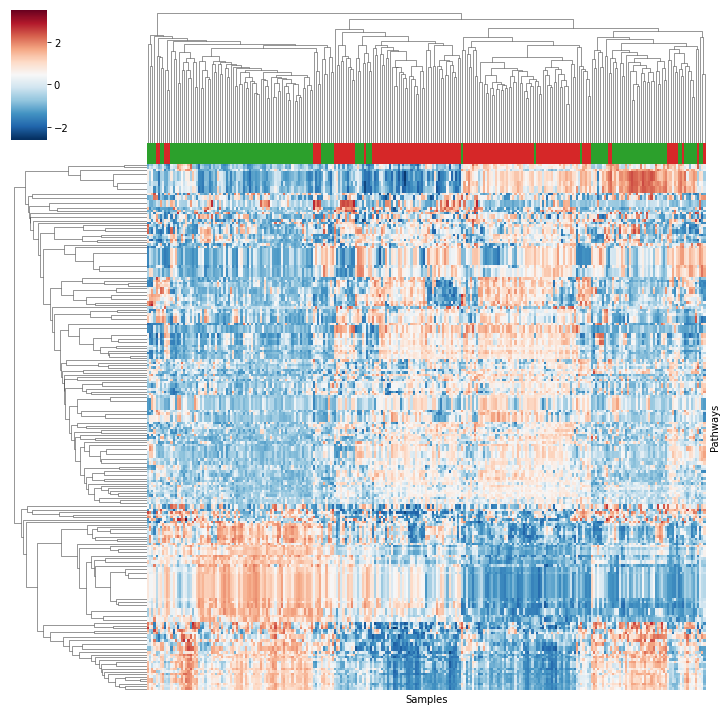

In [6]:
# Plot a heatmap using the pathway scores
g = sns.clustermap(kpca_scores.T,
               cmap="RdBu_r",
               z_score=1,
              col_colors = ["tab:red" if i == "COVID19 " else "tab:green" for i in example_data["Group"]],
              xticklabels=False,
              yticklabels=False)
g.ax_heatmap.set_xlabel("Samples")
g.ax_heatmap.set_ylabel("Pathways")
plt.show()

Using ssClustPA method

In [6]:
ssclustpa_res = sspa.sspa_cluster(example_data.iloc[:, :-2], reactome_pathways)

In [7]:
ssclustpa_res.head()

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112314,R-HSA-112315,R-HSA-112316,R-HSA-1237112,R-HSA-1266738,R-HSA-1368082,...,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9707564,R-HSA-9707616,R-HSA-9709957,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,0.686092,1.978250,3.054088,2.906924,0.614528,3.150440,3.172926,2.830497,0.577994,1.988715,...,3.412581,1.497666,1.497666,2.027400,0.577994,2.463404,2.303371,0.936432,2.268061,0.513695
1008097,1.227926,1.361079,2.638979,3.729600,0.944724,3.183931,3.219696,2.103014,2.402892,0.577443,...,2.956051,0.994147,0.994147,1.645823,2.402892,2.250756,2.499751,0.951916,2.591363,2.327286
1008631,0.923137,2.446584,1.628949,2.175079,0.216541,1.860208,1.922489,2.417710,2.335157,0.440770,...,2.247359,0.996719,0.996719,1.155750,2.335157,1.135429,1.413791,1.576425,1.669030,2.286247
1012545,1.335768,2.418464,3.171258,3.465990,0.563788,3.817446,3.845707,1.558720,1.726178,1.941054,...,2.783308,0.970014,0.970014,3.045595,1.726178,3.481035,3.342645,2.545888,2.999395,0.867966
1022407,1.424180,1.689955,2.995428,3.092717,0.437969,3.356361,3.373692,1.870197,0.996406,1.585746,...,2.897329,0.776872,0.776872,1.811496,0.996406,2.381307,2.205184,0.653758,2.282944,0.870463


Using ssClustPA(proj) method

In [8]:
ssclustpa_proj_res = sspa.sspa_cluster(example_data.iloc[:, :-2], reactome_pathways, projection=True)
ssclustpa_proj_res.head()

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112314,R-HSA-112315,R-HSA-112316,R-HSA-1237112,R-HSA-1266738,R-HSA-1368082,...,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9707564,R-HSA-9707616,R-HSA-9709957,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,-1.138012,0.612266,-1.196473,1.058390,0.231663,1.186966,1.186966,-1.503746,-1.001217,1.001217,...,1.127729,1.127729,1.127729,0.626047,1.003367,1.019928,0.797385,0.264491,0.337755,1.001937
1008097,-1.239243,0.233183,0.821814,2.070620,0.366747,-0.281255,-0.281255,-0.777702,1.102165,-1.102165,...,0.795619,0.795619,0.795619,-0.189060,-1.109737,0.031585,0.359072,1.266075,0.844695,-1.103654
1008631,-0.675104,1.473881,0.650962,0.371524,0.504319,-0.550725,-0.550725,-1.029775,1.061683,-1.061683,...,0.053606,0.053606,0.053606,-0.485135,-1.067348,-1.241347,-0.340290,-0.714006,-0.387968,-1.062813
1012545,-0.966325,0.465256,-1.302114,1.257698,-0.186664,1.566948,1.566948,0.426893,-0.364646,0.364646,...,0.605926,0.605926,0.605926,1.671433,0.342733,0.749489,1.924766,-0.093753,0.319805,0.360651
1022407,-1.303047,0.707896,-1.311350,1.465829,0.759903,1.596556,1.596556,-0.534112,-0.518826,0.518826,...,0.803873,0.803873,0.803873,0.556161,0.513847,0.956530,0.785223,0.788806,0.559682,0.517576


Using z-score method

In [9]:
zscore_res = sspa.sspa_zscore(example_data.iloc[:, :-2], reactome_pathways)

In [10]:
zscore_res.head()

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112314,R-HSA-112315,R-HSA-112316,R-HSA-1237112,R-HSA-1266738,R-HSA-1368082,...,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9707564,R-HSA-9707616,R-HSA-9709957,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,-0.167654,-0.634281,-1.195573,-1.010589,-0.092788,-0.909283,-0.909283,-1.465189,0.658852,0.658852,...,-0.254058,-0.254058,-0.254058,0.588049,0.658852,0.230005,0.164385,-0.386723,-0.427604,0.993357
1008097,-1.397061,-0.245093,-2.396622,-2.046443,-0.147668,-2.395123,-2.395123,-0.769212,-0.583845,-0.583845,...,-0.342975,-0.342975,-0.342975,-0.119131,-0.583845,-0.435729,-0.709389,-0.006923,-0.327141,-1.101735
1008631,0.461736,-1.477089,-1.406400,-0.336006,-0.529297,-1.241239,-1.241239,-0.919933,-0.626855,-0.626855,...,-0.616980,-0.616980,-0.616980,-0.436981,-0.626855,-0.999337,-0.450087,-0.561914,-0.515378,-1.061005
1012545,0.701684,-0.429032,-0.038955,-1.115958,0.160970,-0.316692,-0.316692,0.200689,1.142506,1.142506,...,-0.713366,-0.713366,-0.713366,1.730048,1.142506,0.443188,1.201164,1.027331,1.137367,0.358604
1022407,-0.112825,-0.703408,-0.005595,-1.447454,-0.784849,-0.564315,-0.564315,-0.560817,0.696354,0.696354,...,-0.870950,-0.870950,-0.870950,0.545654,0.696354,-0.014220,0.094409,0.056086,-0.243176,0.526767


Using SVD (PLAGE) method

In [12]:
svd_res = sspa.sspa_svd(example_data.iloc[:, :-2], reactome_pathways)
svd_res.head()

,R-HSA-109582,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112314,R-HSA-112315,R-HSA-112316,R-HSA-1237112,R-HSA-1266738,R-HSA-1368082,...,R-HSA-9660821,R-HSA-9662851,R-HSA-9664433,R-HSA-9707564,R-HSA-9707616,R-HSA-9709957,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
1004596,0.053439,0.034742,-0.024311,0.034779,0.005188,0.023736,0.023736,0.077489,-0.045696,-0.045696,...,-0.021656,-0.021656,-0.021656,-0.043171,-0.045696,-0.038112,-0.050812,-0.015621,-0.017493,-0.044859
1008097,0.063985,0.013425,0.050263,0.087979,0.008256,-0.023342,-0.023342,0.040681,0.051777,0.051777,...,0.005050,0.005050,0.005050,0.062723,0.051777,-0.007703,0.026933,-0.055497,-0.043114,0.049754
1008631,0.028972,0.080906,0.041114,0.013106,0.029592,-0.034629,-0.034629,0.048652,0.049381,0.049381,...,0.019808,0.019808,0.019808,0.051500,0.049381,0.048971,0.041663,0.032112,0.024307,0.047914
1012545,0.042074,0.023500,-0.034746,0.009973,-0.009000,0.026112,0.026112,-0.010614,-0.009740,-0.009740,...,0.032331,0.032331,0.032331,0.028438,-0.009740,-0.036042,-0.036334,-0.003646,-0.021137,-0.016194
1022407,0.067931,0.038528,-0.039728,0.060691,0.043879,0.049868,0.049868,0.029660,-0.021638,-0.021638,...,-0.006885,-0.006885,-0.006885,-0.015345,-0.021638,-0.041113,-0.032891,-0.040322,-0.032426,-0.023788


# ORA

In [13]:
ora_res = sspa.sspa_ora(example_data.iloc[:, :-2], example_data["Group"], reactome_pathways, 0.05)

/Users/cw2019/opt/anaconda3/envs/py10/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
ora_res

,ID,Pathway_name,Hits,Coverage,P-value,P-adjust
0,R-HSA-109582,Hemostasis,3/4,4/84,0.710733,0.995206
1,R-HSA-110331,Cleavage of the damaged purine,2/2,2/9,0.537484,0.995206
2,R-HSA-112310,Neurotransmitter release cycle,8/10,10/48,0.475000,0.995206
3,R-HSA-112311,Neurotransmitter clearance,5/6,6/32,0.494162,0.995206
4,R-HSA-112314,Neurotransmitter receptors and postsynaptic si...,1/2,2/25,0.929582,0.995206
...,...,...,...,...,...,...
209,R-HSA-9709957,Sensory Perception,6/10,10/191,0.904435,0.995206
210,R-HSA-9711123,Cellular response to chemical stress,4/5,5/45,0.597903,0.995206
211,R-HSA-9717189,Sensory perception of taste,4/6,6/93,0.805387,0.995206
212,R-HSA-9717207,"Sensory perception of sweet, bitter, and umami...",3/5,5/89,0.879978,0.995206


## Specifying your own data

In [ ]:
# Read in omics data as a pandas DataFrame
mydat = pd.read_csv("")
kpca_scores_2 = sspa.sspa_kpca(mydat, reactome_pathways)

## Specifying your own pathways

In [7]:
custom_pathways = sspa.ProcessPathways('path.csv').process_gmt()

FileNotFoundError: [Errno 2] No such file or directory: 'path.csv'